In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install kaggle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [5]:
!kaggle datasets download -d shubhankitsirvaiya06/diamond-price-prediction

  0% 0.00/606k [00:00<?, ?B/s]
100% 606k/606k [00:00<00:00, 139MB/s]


In [6]:
import zipfile

# Define the path to your zip file
file_path = '/content/diamond-price-prediction.zip'  # Replace 'your_file.zip' with your file's name

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle')

In [7]:
import numpy as np
import pandas as pd

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("/content/drive/MyDrive/kaggle/diamonds.csv")

In [10]:
data.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [12]:
data.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [13]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [14]:
data.shape

(53940, 10)

In [15]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [16]:
data['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [17]:
data['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [18]:
data['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [19]:
data.duplicated().sum()

146

In [20]:
import warnings
warnings.filterwarnings('ignore')

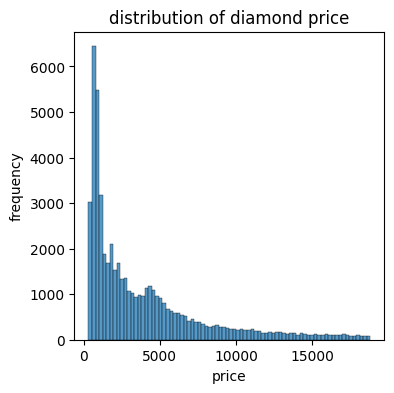

In [21]:
#distribution of target variable
plt.figure(figsize=(4,4))
sns.histplot(data['price'])
plt.title("distribution of diamond price")
plt.xlabel("price")
plt.ylabel("frequency")
plt.show()

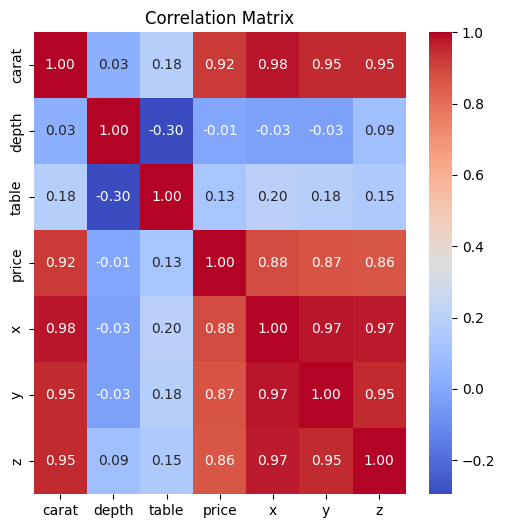

In [22]:
# Explore the correlation between numerical features
correlation_matrix = data.corr()
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [23]:
fig = plt.figure(figsize = (20, 10))

ax_1 = fig.add_subplot(3, 3, 1)
ax_2 = fig.add_subplot(3, 3, 2)
ax_3 = fig.add_subplot(3, 3, 3)
ax_4 = fig.add_subplot(3, 3, 4)
ax_5 = fig.add_subplot(3, 3, 5)
ax_6 = fig.add_subplot(3, 3, 6)

sns.lineplot(data = data, x = "carat", y = "price", ax = ax_1)
sns.lineplot(data = data, x = "depth", y = "price", ax = ax_2)
sns.lineplot(data = data, x = "table", y = "price", ax = ax_3)
sns.lineplot(data = data, x = "x", y = "price", ax = ax_4)
sns.lineplot(data = data, x = "y", y = "price", ax = ax_5)
sns.lineplot(data = data, x = "z", y = "price", ax = ax_6)

plt.show()

In [24]:
fig = plt.figure(figsize = (20, 10))

ax_1 = fig.add_subplot(3, 3, 1)
ax_2 = fig.add_subplot(3, 3, 2)
ax_3 = fig.add_subplot(3, 3, 3)

sns.barplot(data = data, x = "cut", y = "price", ax = ax_1)
sns.barplot(data = data, x = "color", y = "price", ax = ax_2)
sns.barplot(data = data, x = "clarity", y = "price", ax = ax_3)

plt.show()

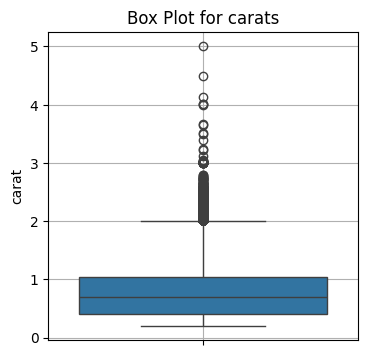

In [25]:
# Box plot to visualize the distribution of price across different cuts
plt.figure(figsize=(4,4))
sns.boxplot(data['carat'])
plt.title('Box Plot for carats')
plt.grid()
plt.show()

In [26]:
#data cleaning
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [27]:
data.duplicated().sum()

146

In [28]:
data=data.drop_duplicates()

In [29]:
data.shape

(53794, 10)

In [30]:
# Identify outliers using statistical methods
Q1 = data['carat'].quantile(0.25)
Q3 = data['carat'].quantile(0.75)
IQR = Q3 - Q1
outliers = (data['carat'] < Q1 - 1.5 * IQR) | (data['carat'] > Q3 + 1.5 * IQR)

# Remove or transform outliers
data_cleaned = data[~outliers]

<Axes: ylabel='carat'>

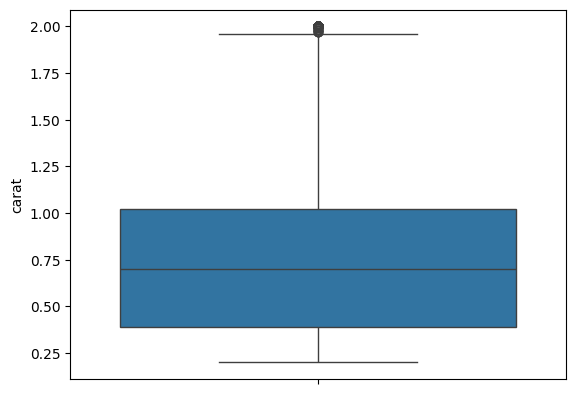

In [31]:
sns.boxplot(data_cleaned['carat'])

<Axes: xlabel='price', ylabel='Density'>

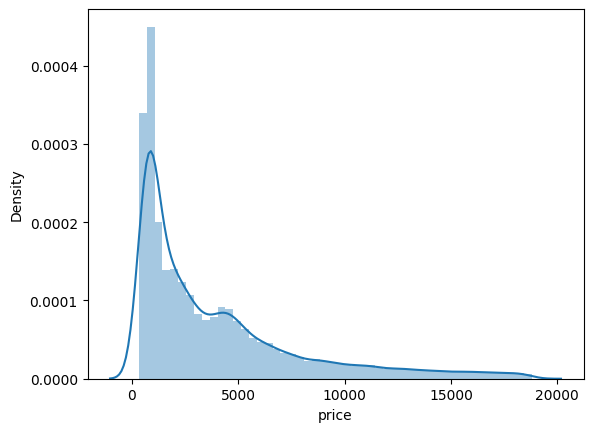

In [32]:
#original dist plot
sns.distplot(data['price'])

In [33]:
data['price'] = np.log1p(data['price'])

<Axes: xlabel='price', ylabel='Density'>

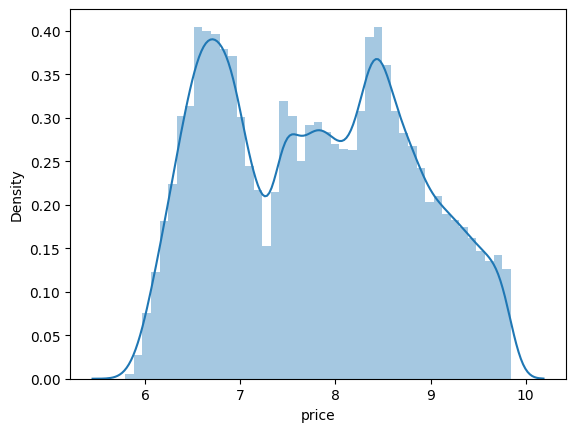

In [34]:
sns.distplot(data['price'])

In [35]:
cut_vals={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
data['cut'] = data['cut'].map(cut_vals)
color_vals= {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
data['color'] = data['color'].map(color_vals)
clarity_vals={'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}
data['clarity'] = data['clarity'].map(clarity_vals)

In [36]:
data.head()

carat  cut  color  clarity  depth  table     price     x     y     z
0   0.23    5      6        2   61.5   55.0  5.789960  3.95  3.98  2.43
1   0.21    4      6        3   59.8   61.0  5.789960  3.89  3.84  2.31
2   0.23    2      6        5   56.9   65.0  5.793014  4.05  4.07  2.31
3   0.29    4      2        4   62.4   58.0  5.814131  4.20  4.23  2.63
4   0.31    2      1        2   63.3   58.0  5.817111  4.34  4.35  2.75

In [37]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [39]:
# Assigning the featurs as X and trarget as y
X= data.drop(["price"],axis =1)
y= data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [40]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

In [41]:
# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [42]:
# Original RMSE values
rmse_values = [-0.186507, -0.124878, -0.092377, -0.137049, -0.088693]

# Model names
model_names = ["LinearRegression", "DecisionTree", "RandomForest", "KNeighbors", "XGBRegressor"]

# Convert RMSE values to percentages
rmse_values_percentage = [rmse * 100 for rmse in rmse_values]

# Print the RMSE values as percentages for each model
for i, model_name in enumerate(model_names):
    print("%s: %.2f%%" % (model_name, rmse_values_percentage[i]))

LinearRegression: -18.65%
DecisionTree: -12.49%
RandomForest: -9.24%
KNeighbors: -13.70%
XGBRegressor: -8.87%


In [43]:
pred = pipeline_xgb.predict(X_test)

In [44]:
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9922187097737264
Adjusted R^2: 0.9922134987005784
MAE: 0.06383098871232132
MSE: 0.008033376278668918
RMSE: 0.08962910397113717
